# **Web and Social Media Analytics: Capstone Project**

# **Problem Statement**


Customer is a mobile manufacturer based in the US, who entered the market three years ago. As a new entrant in the sector, they want to understand their competitors and preferences of their users so that they can design their strategies accordingly.They want to tweak the marketing strategies to add more value to their brand, provide features to customers that add the most value, and close the demand-supply gap. Their objective is to increase the market share as well as the brand value.

The solution steps has been divided to two parts.

Part 1 contains data understanding, EDA and text analytics.

Part 2 contains visualisation, dashboarding and model building.

# **Part 1**

Step 1: Understanding the data

Step 2: Data pre-processing

Step 3: Text Analysis

## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Mounting Google Drive with Colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## The following data sets are available

   1. meta data of type .json used as dataframe 'df_meta'
   2. phone data of type .csv used as dataframe 'df_phonedata'

The meta data holds information from sellers point of view and the phone data holds user information. We begin by unzipping the meta data file and extracting its content to a list

# Step 1: Understanding the Data

In [3]:
# Reading the meta data
# importing libraries

import gzip
import shutil
import os

# Path to the meta data zip file.
path1 = '/content/gdrive/MyDrive/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/gdrive/MyDrive/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
# If you need the file in your Google Drive, move it after unzipping.
#shutil.move(path2, '/content/gdrive/My Drive/Capstone Project/csv files/meta_Cell_Phones_and_Accessories.json')

In [4]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries.
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [5]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [6]:
# Converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

*Understanding the df_meta, EDA and its analysis will follow after analysis of df_phonedata.*




In [7]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/gdrive/My Drive/Cell_Phones_and_Accessories_5.csv')

<ipython-input-7-cf412482fcdc>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_phonedata = pd.read_csv('/content/gdrive/My Drive/Cell_Phones_and_Accessories_5.csv')


In [8]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


# Step 2.1: Data pre-processing of 'df_phonedata'

---



In [9]:
# Converting unix review time to date-time format

from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

# Exploratory Data Analysis on 'df_phonedata'

In [10]:
# Checking the dataset shape
df_phonedata.shape

(1128437, 13)

In [11]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128235 non-null  object 
 6   reviewText        1127607 non-null  object 
 7   summary           1127898 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
 12  Date&Time         1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 104.4+ MB


In [12]:
# Checking numerical description of dataset
df_phonedata.describe()

,overall,unixReviewTime
count,1.128437e+06,1.128437e+06
mean,4.221383e+00,1.440400e+09
std,1.231917e+00,4.569215e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444349e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


In [13]:
# Checking for null values percentage
df_phonedata.isnull().sum()/len(df_phonedata)*100

,0
overall,0.000000
verified,0.000000
reviewerID,0.000000
asin,0.000000
style,46.364662
reviewerName,0.017901
reviewText,0.073553
summary,0.047765
unixReviewTime,0.000000
vote,91.844117


In [14]:
# Fill null values in vote to 0
df_phonedata['vote'].fillna(0,inplace=True)

<ipython-input-14-909c9d70428c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_phonedata['vote'].fillna(0,inplace=True)


In [15]:
# Dropping the columns with more than 40% null values
df_phonedata.drop(columns=['style', 'image'], axis=1, inplace=True)

In [16]:
# Checking the null percentages again
df_phonedata.isnull().sum()/len(df_phonedata)*100

,0
overall,0.000000
verified,0.000000
reviewerID,0.000000
asin,0.000000
reviewerName,0.017901
reviewText,0.073553
summary,0.047765
unixReviewTime,0.000000
vote,0.000000
review_sentiment,0.000000


If review text is null then its not going to usefull to perform sentiment analysis, so we will drop rows having reviewtext null.

In [17]:
# Dropping the rows with null counts
df_phonedata = df_phonedata[df_phonedata['reviewText'].notna()]

No null values found in the column

In [18]:
# Check null values percentage again
df_phonedata.isnull().sum()/len(df_phonedata)*100

,0
overall,0.000000
verified,0.000000
reviewerID,0.000000
asin,0.000000
reviewerName,0.017825
reviewText,0.000000
summary,0.042657
unixReviewTime,0.000000
vote,0.000000
review_sentiment,0.000000


In [19]:
df_phonedata.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,0,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,0,POSITIVE,2014-02-11
2,3.0,True,AB6CHQWHZW4TV,7508492919,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,0,NEGATIVE,2014-02-07
3,2.0,True,A1M117A53LEI8,7508492919,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,0,POSITIVE,2014-02-03
4,4.0,True,A272DUT8M88ZS8,7508492919,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,0,POSITIVE,2014-02-02


In [20]:
df_phonedata.shape

(1127607, 11)

# Step 2.2: Data pre-processing  and EDA of 'df_meta'

In [21]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


In [22]:
# We only need 'cellphone' from the category column for further analysis
df_meta["category_new"] = [l[1] if len(l) > 0 else np.nan for l in df_meta["category"]]

In [23]:
df_meta = df_meta[df_meta["category_new"] == "Cell Phones"]

In [24]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_new
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,8050110508,Cell Phones
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Standard package: 1 x original phone 1 x Qual...,,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR,Cell Phones
1295,"[Cell Phones & Accessories, Cell Phones]",,[The Nokia 5180i is a handset offered by TracF...,,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],[https://images-na.ssl-images-amazon.com/image...,,Nokia,[],[],[],{},Cell Phones & Accessories,,,,B00005S0M4,Cell Phones
1354,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Based on Motorola&#x92;s i90c phone, the i95c...",,Motorola i95cl Phone (Nextel),[],[https://images-na.ssl-images-amazon.com/image...,,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006J9HH,Cell Phones
1361,"[Cell Phones & Accessories, Cell Phones, Carri...",,[This is a GSM Samsung R225 cellular phone tha...,,T-Mobile Dual-Band Wireless Phone,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006LIQB,Cell Phones


In [25]:
# Converting to csv file and storing it related to cellphone only
df_meta.to_csv('/content/gdrive/My Drive/CapstoneProject/cellphone_data.csv',escapechar='\\')


In [26]:
# Reading the cellphone metadata
cellphone_data = pd.read_csv('/content/gdrive/My Drive/CapstoneProject/cellphone_data.csv')

In [27]:
cellphone_data.shape

(9823, 20)

In [28]:
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9823 non-null   int64  
 1   category      9823 non-null   object 
 2   tech1         31 non-null     object 
 3   description   9823 non-null   object 
 4   fit           0 non-null      float64
 5   title         9823 non-null   object 
 6   also_buy      9823 non-null   object 
 7   image         9823 non-null   object 
 8   tech2         9 non-null      object 
 9   brand         9697 non-null   object 
 10  feature       9823 non-null   object 
 11  rank          9823 non-null   object 
 12  also_view     9823 non-null   object 
 13  details       9823 non-null   object 
 14  main_cat      9809 non-null   object 
 15  similar_item  2934 non-null   object 
 16  date          239 non-null    object 
 17  price         1745 non-null   object 
 18  asin          9823 non-null 

In [29]:
cellphone_data.isnull().sum()

,0
Unnamed: 0,0
category,0
tech1,9792
description,0
fit,9823
title,0
also_buy,0
image,0
tech2,9814
brand,126


We see the 8 columns with null values however, column 'brand' and 'main_cat' has nulls in small numbers

In [30]:
# Dropping category column as we already created new column category_new with only cellphones
cellphone_data.drop('category', axis=1, inplace= True)

In [31]:
# Dropping column Unnamed as it is not required
cellphone_data.drop('Unnamed: 0', axis=1, inplace=True)

Coming to price, since it is an important feature, we will impute with the mean value of brand's price

In [32]:
cellphone_data['price'].value_counts()

price
$40.08                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [33]:
# Impute null where price is a descriptive text
cellphone_data["price"]=[np.nan if len(str(x))>15 else x for x in cellphone_data["price"]]

In [34]:
cellphone_data['price'].value_counts()

,count
price,
$40.08,133
$27.57,130
$16.00,44
$49.99,38
$54.99,30
...,...
$159.06,1
$82.00,1
$272.98,1


In [35]:
# Replace $ to none and convert price to float
cellphone_data["price"]= cellphone_data["price"].str.replace("$",'')

In [36]:
# Replace commas to none
cellphone_data["price"]= cellphone_data["price"].str.replace(",",'')

In [37]:
# Converting price column from object dtype to numeric
cellphone_data['price']= pd.to_numeric(cellphone_data['price'], errors='coerce')

In [38]:
cellphone_data['price'].value_counts()

,count
price,
40.08,133
27.57,130
16.00,44
49.99,38
54.99,30
...,...
159.06,1
82.00,1
272.98,1


In [39]:
# Checking the overall null values in price column
cellphone_data["price"].isnull().sum()

8124

In [40]:
# Checking the brand wise null value
cellphone_data[cellphone_data["price"].isnull()]['brand'].value_counts()

,count
brand,
Samsung,1212
LG,616
Motorola,601
Nokia,456
BLU,440
...,...
MYSAGA,1
GoPro,1
LSoug,1


In [41]:
# Imputing null price with their brand's mean price
cellphone_data['price'] = cellphone_data['price'].fillna(cellphone_data.groupby('brand')['price'].transform('mean'))

In [42]:
cellphone_data.isnull().sum()/len(cellphone_data)*100

,0
tech1,99.684414
description,0.000000
fit,100.000000
title,0.000000
also_buy,0.000000
image,0.000000
tech2,99.908378
brand,1.282704
feature,0.000000
rank,0.000000


Droping columns with more than 50% null values

In [43]:
# As we can see fit,tech2,tech1,date,similar_item columns have more than 70% data are null so we will drop these columns
cellphone_data.drop(labels=['fit','tech2','tech1','date','similar_item'], axis=1, inplace=True)

In [44]:
# Also dropping main_cat as we only require cellphone data
cellphone_data.drop(['main_cat'], axis=1, inplace=True)

In [45]:
# As we are peforming text analysis later, image column is not required
cellphone_data.drop(['image'], axis=1, inplace=True)

In [46]:
# Now checking the duplicate asin
len(cellphone_data[cellphone_data.duplicated('asin')])

34

In [47]:
# Dropping duplicates as only unique asin should be present
cellphone_data = cellphone_data.drop_duplicates()

In [48]:
# Checking if rank has any blank value
len(cellphone_data[cellphone_data['rank']=='[]'])

191

In [49]:
# Checkin if feature has blank values
len(cellphone_data[cellphone_data['feature']=='[]'])

1360

In [50]:
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9822
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   9789 non-null   object 
 1   title         9789 non-null   object 
 2   also_buy      9789 non-null   object 
 3   brand         9666 non-null   object 
 4   feature       9789 non-null   object 
 5   rank          9789 non-null   object 
 6   also_view     9789 non-null   object 
 7   details       9789 non-null   object 
 8   price         7626 non-null   float64
 9   asin          9789 non-null   object 
 10  category_new  9789 non-null   object 
dtypes: float64(1), object(10)
memory usage: 917.7+ KB


In [51]:
# Extracting rank in cellphones and acessories
cellphone_data["new_rank"]=cellphone_data["rank"].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]

<ipython-input-51-fefd2d638f78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellphone_data["new_rank"]=cellphone_data["rank"].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]


In [52]:
cellphone_data["new_rank"]=cellphone_data["new_rank"].str.replace(">#","").str.replace("in Cell Phones & Accessories","").str.replace(",","")

<ipython-input-52-a9273a8ba843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellphone_data["new_rank"]=cellphone_data["new_rank"].str.replace(">#","").str.replace("in Cell Phones & Accessories","").str.replace(",","")


In [53]:
# Converting new rank column to integer
cellphone_data["new_rank"] = cellphone_data["new_rank"].astype("float")

<ipython-input-53-8a75a19aef93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellphone_data["new_rank"] = cellphone_data["new_rank"].astype("float")


In [54]:
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9822
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   9789 non-null   object 
 1   title         9789 non-null   object 
 2   also_buy      9789 non-null   object 
 3   brand         9666 non-null   object 
 4   feature       9789 non-null   object 
 5   rank          9789 non-null   object 
 6   also_view     9789 non-null   object 
 7   details       9789 non-null   object 
 8   price         7626 non-null   float64
 9   asin          9789 non-null   object 
 10  category_new  9789 non-null   object 
 11  new_rank      9400 non-null   float64
dtypes: float64(2), object(10)
memory usage: 994.2+ KB


In [55]:
# Dropping rank column as we got new_rank column
cellphone_data.drop(["rank"],axis=1, inplace=True)

In [56]:
cellphone_data.head(5)

,description,title,also_buy,brand,feature,also_view,details,price,asin,category_new,new_rank
0,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...",[],{},NaN,8050110508,Cell Phones,6356920.0
1,['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},91.698740,B00005KBGR,Cell Phones,NaN
2,"[""The Nokia 5180i is a handset offered by Trac...",Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],Nokia,[],[],{},91.698740,B00005S0M4,Cell Phones,NaN
3,"['Based on Motorola&#x92;s i90c phone, the i95...",Motorola i95cl Phone (Nextel),[],NaN,[],[],{},NaN,B00006J9HH,Cell Phones,3798962.0
4,['This is a GSM Samsung R225 cellular phone th...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],[],{},117.247465,B00006LIQB,Cell Phones,5552033.0


We have also_view column to derive viewed brand by customers

In [57]:
# Convert also_view brand to list
cellphone_data=cellphone_data.assign(also_view_new=cellphone_data.also_view.str.replace('[','').str.replace(']','').str.replace(' ','').str.replace('\'',"").str.split(','))

In [58]:
# Function to get brand name from the list of also_view

def getalsoview_brand(l):
    lb=[]
    brand=""
    for i in range(0,len(l)):
        b=cellphone_data[cellphone_data["asin"]==l[i]]["brand"]

        if len(b)>0:
            brand=b.values[0]
            if brand not in lb:
                lb.append(brand)

    return lb

In [59]:
# Fetch unique brand from also_view
cellphone_data["also_view_brand"] =[getalsoview_brand(l) if len(l) > 0 else np.nan for l in cellphone_data["also_view_new"]]

In [60]:
# Dropping columns also_view
cellphone_data.drop('also_view', axis=1, inplace=True)

In [61]:
cellphone_data.head()

,description,title,also_buy,brand,feature,details,price,asin,category_new,new_rank,also_view_new,also_view_brand
0,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...",{},NaN,8050110508,Cell Phones,6356920.0,[],[]
1,['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...",{},91.698740,B00005KBGR,Cell Phones,NaN,"[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...","[Nokia, Caterpillar, BLU, Fsmart, ZTE, Higoo]"
2,"[""The Nokia 5180i is a handset offered by Trac...",Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],Nokia,[],{},91.698740,B00005S0M4,Cell Phones,NaN,[],[]
3,"['Based on Motorola&#x92;s i90c phone, the i95...",Motorola i95cl Phone (Nextel),[],NaN,[],{},NaN,B00006J9HH,Cell Phones,3798962.0,[],[]
4,['This is a GSM Samsung R225 cellular phone th...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],{},117.247465,B00006LIQB,Cell Phones,5552033.0,[],[]


In [62]:
cellphone_data.describe()

,price,new_rank
count,7626.000000,9.400000e+03
mean,97.199677,1.857680e+06
std,73.985580,1.790868e+06
min,4.800000,7.770000e+02
25%,69.000000,5.561145e+05
50%,79.675088,1.226360e+06
75%,117.247465,2.444491e+06
max,1924.000000,7.731287e+06


In [63]:
cellphone_data.isnull().sum()

,0
description,0
title,0
also_buy,0
brand,123
feature,0
details,0
price,2163
asin,0
category_new,0
new_rank,389


In [64]:
#Removing Nulls, 0s, [] and empty fields in brand column
cellphone_data = cellphone_data[~cellphone_data['brand'].isin(['Null', '0', '[]']) & cellphone_data['brand'].notna() & (cellphone_data['brand'].str.strip() != '')]

In [65]:
cellphone_data.isnull().sum()

,0
description,0
title,0
also_buy,0
brand,0
feature,0
details,0
price,2057
asin,0
category_new,0
new_rank,385


We will keep the rest of the null values for top brand analysis


# Step 2.3: Merging Dataframe



In [66]:
# Merge two dataframe using innerjoin
df_merged = pd.merge(df_phonedata, cellphone_data, how='inner', on=['asin'])

In [67]:
# Saving the file in the gdrive
df_merged.to_csv("/content/gdrive/My Drive/CapstoneProject/df_merged.csv")

In [68]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,...,title,also_buy,brand,feature,details,price,category_new,new_rank,also_view_new,also_view_brand
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]


In [69]:
# After merging dataframes lets change datatypes of boolean columns to integer (true =1, false=0)
df_merged["verified"].replace({False: 0, True: 1}, inplace=True)

<ipython-input-69-61659713dee7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["verified"].replace({False: 0, True: 1}, inplace=True)
<ipython-input-69-61659713dee7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged["verified"].replace({False: 0, True: 1}, inplace=True)


In [70]:
len(df_merged)

63763

In [71]:
# Counting positive and negative instances
pos_neg = df_merged.review_sentiment.value_counts()
pos_neg

,count
review_sentiment,
POSITIVE,47627
NEGATIVE,16136


Checking counts of positive and negative table

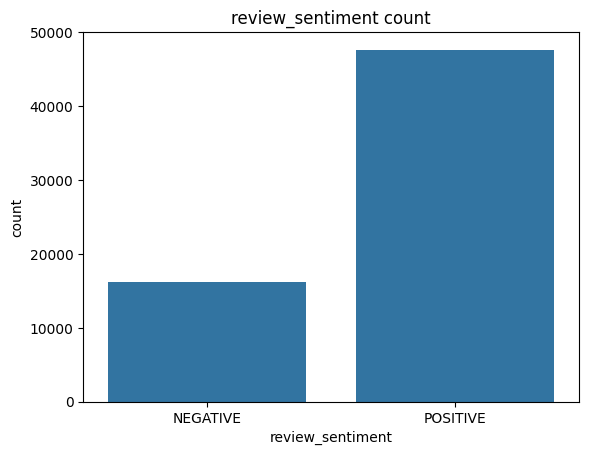

In [72]:
plt.title("review_sentiment count")
sns.countplot(data=df_merged, x='review_sentiment')
plt.show()

In [73]:
# display number of positive and negative reviews

neg  = pos_neg[1]
pos  = pos_neg[0]

print("No. of negative review: ", neg)
print("\nNo. of positive review: ", pos)
print("\nnegative review rate is about {0}%".format(round((neg/float(pos+neg))*100), 2))
print("\npositve review rate is about {0}%".format(round((pos/float(pos+neg))*100), 2))

No. of negative review:  16136

No. of positive review:  47627

negative review rate is about 25%

positve review rate is about 75%


<ipython-input-73-272ff9fe8d85>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neg  = pos_neg[1]
<ipython-input-73-272ff9fe8d85>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos  = pos_neg[0]


We can see data is imbalanced.

## Let's check how review sentiment change the overall rating

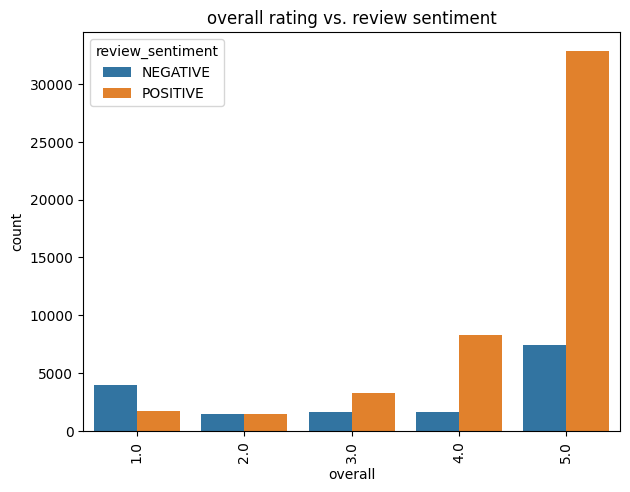

In [74]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["overall"],hue=df_merged["review_sentiment"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("overall rating vs. review sentiment")
plt.show()

Observation : From above plot we can say that positive reviews have high overall rating as expected , no any different pattern found. for rating 1 the negative reviews are more.

## Top 10 Brands by review count

In [75]:
# top 10 brand having more count of reviews
df_merged['brand'].value_counts()[:10]

,count
brand,
Samsung,16193
BLU,9326
LG,6657
Motorola,4922
Nokia,4885
Apple,4049
BlackBerry,3656
HTC,2453
Sony,1556


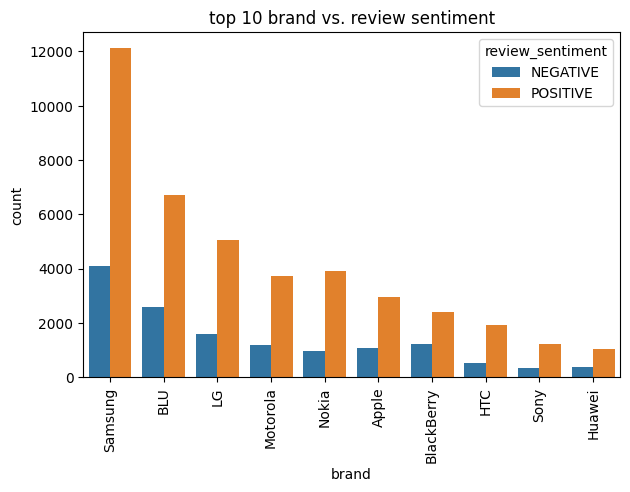

In [76]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["brand"],hue=df_merged["review_sentiment"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("top 10 brand vs. review sentiment")
plt.show()


## Top 10 brands vs. their ranks in cellphone category

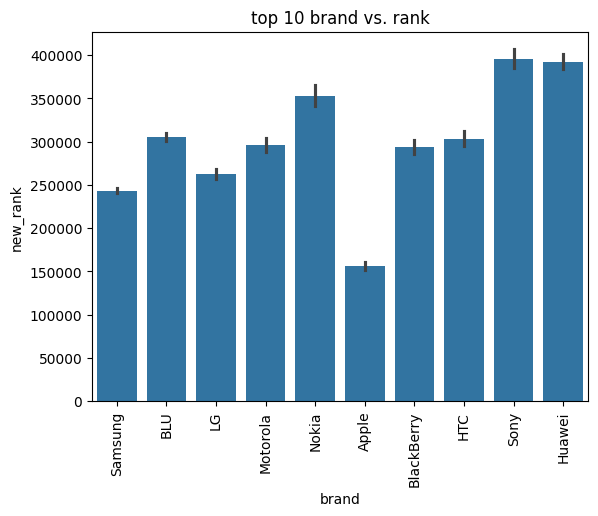

In [77]:
plt.figure()
sns.barplot (data=df_merged,x=df_merged["brand"],y=df_merged["new_rank"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.title("top 10 brand vs. rank")
plt.show()

It shows Sony leading with rank category

## Checking verified reviews

In [78]:
df_merged["verified"].value_counts()

,count
verified,
1,54941
0,8822


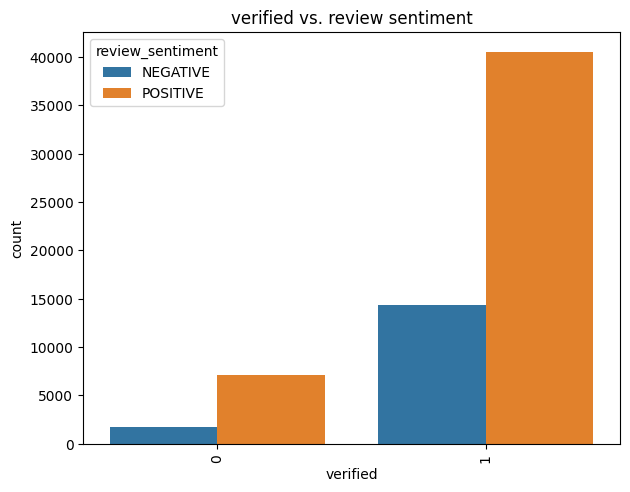

In [79]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["verified"],hue=df_merged["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("verified vs. review sentiment")
plt.show()

Majority of reviews are verified

## Number of reviews per year

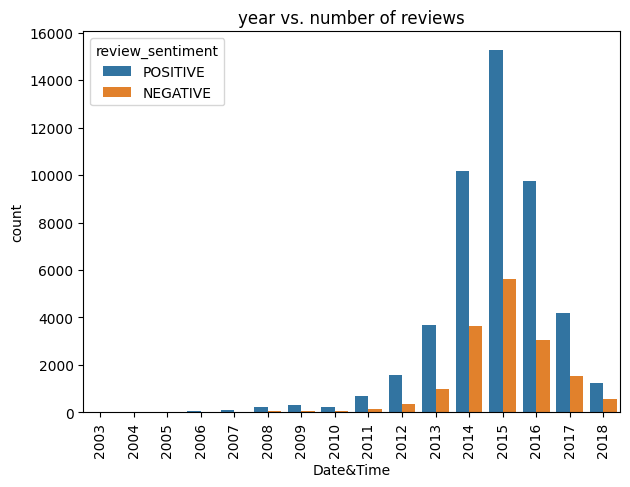

In [80]:
plt.figure()
sns.countplot(data=df_merged,x=pd.DatetimeIndex(df_merged['Date&Time']).year,hue=df_merged["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("year vs. number of reviews")
plt.show()

Between 2014-2016, highest reviews received and see downward trend post that

## Top 10 Brands Prices

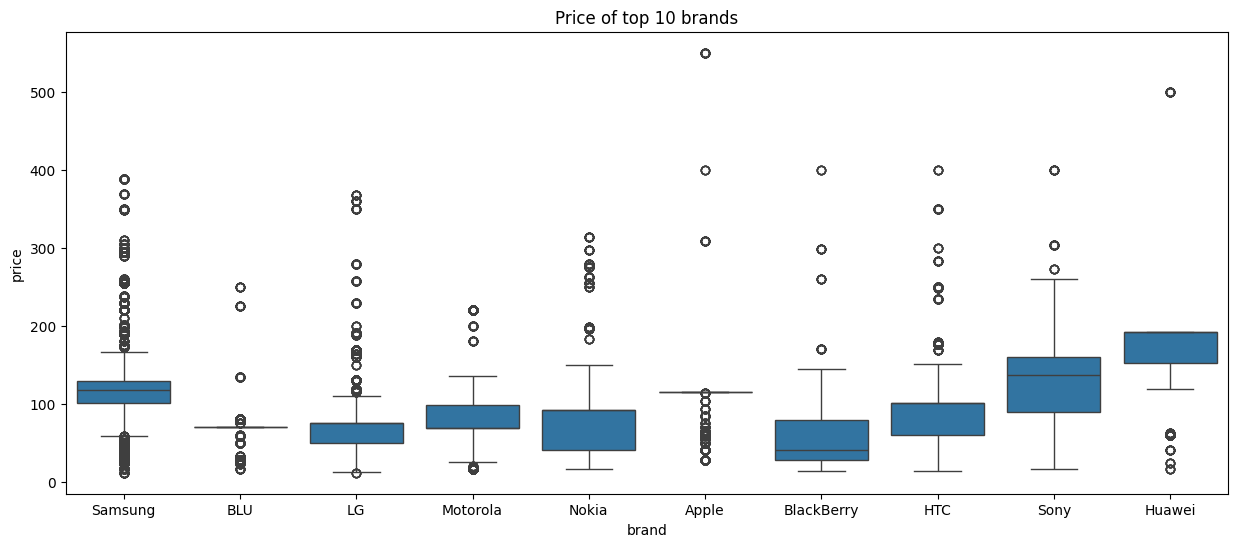

In [81]:
plt.figure(figsize=[15,6])
plt.title("Price of top 10 brands")
sns.boxplot(data=df_merged,x="brand",y="price",order=df_merged["brand"].value_counts().iloc[:10].index)
plt.show()

## Price distribution



In [82]:
df_merged["price"].value_counts()

,count
price,
69.594118,8493
117.247465,6950
115.123617,3315
75.618945,3009
69.264778,2579
...,...
22.990000,5
219.490000,3
17.970000,3


## Price distribution wise Reviews

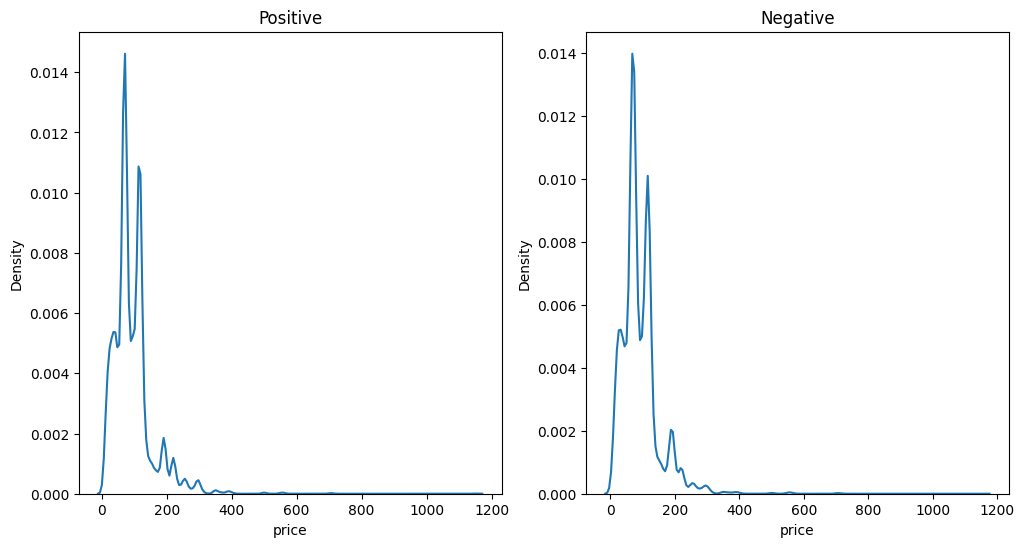

In [83]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Positive")
ax2 = fig.add_subplot(1, 2, 2, title="Negative")

sns.kdeplot(df_merged[df_merged["review_sentiment"] == "POSITIVE"]["price"], ax=ax1)
sns.kdeplot(df_merged[df_merged["review_sentiment"] == "NEGATIVE"]["price"], ax=ax2)

plt.show()

Most reviews comes in the price range of 60 to 100 dollars.

# **Step 3: Text Analytics**

In [84]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/stop_words_long.txt')]

First step is to remove stop words , here we will use above file to remove stop words because we dont want to remove "no,not" like words which help us in text analytics. Also we will remove any puncuation marks and numbers etc.

In [85]:
#Functions removing stop words , positive and negative words and punctuation marks
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocess(document):

    # change sentence to lower case
    document = document.lower()


    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]


    # take only thos words whose length is greater than 2
    words=[w for w in words if len(w)>2]

    # join words to make sentence
    document = " ".join(words)

    return document

# function to remove positive / negative words from document
def remove_words(document):
   # tokenize into words
    words = word_tokenize(document)

    words = [word for word in words if word not in positive_words]
    words = [word for word in words if word not in negative_words]

    document = " ".join(words)

    return document

# function to remove punctuations
def remove_punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)

    return text

In [86]:
# now run lemmatization

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def apply_lemmatization(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]

    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[w for w in words if len(w)>2]

    # join words to make sentence
    document = " ".join(words)

    return document

## Preprocessing review text for tableau visualization

In [87]:
# Make new dataframe for only reviews and sentiment
df_review=df_merged[["reviewText","review_sentiment"]]

In [88]:
import nltk
nltk.download('punkt_tab')

df_review["review_text_nostop"]=[preprocess(x) for x in df_review["reviewText"]]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-88-74bdbb002b95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"]=[preprocess(x) for x in df_review["reviewText"]]


In [89]:
df_review["review_text_nostop"]

,review_text_nostop
0,phone ugly heavy terrible user interface techi...
1,samsung v205 decided try e715 fyi people batte...
2,samsung phone not measure-up v300 tmobile cust...
3,europe phones networks better samsung currentl...
4,phone amazingly light camera phone flashlight/...
...,...
63758,phone good freezing touching power home button...
63759,price
63760,awesome thanks love
63761,work fantastic n't issues received yes refurbi...


In [90]:
# Reading positive words from a text file in to a list
positive_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/pos_words.txt')]

In [91]:
# Reading negative words from a text file in to a list
negative_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/neg_words.txt')]

In [92]:
df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuations)

<ipython-input-92-8139f0ebb607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuations)


In [93]:
# After removing punctuation marks still there are some stop words so running above function to remove remaining stopwords and do lemmatization.
df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]

<ipython-input-93-c4014c588c83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]


In [94]:
df_review["review_text_nostop"]

,review_text_nostop
0,phone ugly heavy terrible user interface techi...
1,samsung decide try fyi people battery problems...
2,samsung phone not measure tmobile customer fin...
3,europe phone network better samsung currently ...
4,phone amazingly light camera phone flashlight ...
...,...
63758,phone good freeze touch power home button time
63759,price
63760,awesome thank love
63761,work fantastic issue receive yes refurbish lit...


In [95]:
# Divided positive and negative review in different dataframe to create word cloud in tableau

df_positive = df_review[df_review["review_sentiment"]=="POSITIVE"][["review_text_nostop","review_sentiment"]]
df_negative = df_review[df_review["review_sentiment"]=="NEGATIVE"][["review_text_nostop","review_sentiment"]]

In [96]:
df_positive.head()

,review_text_nostop,review_sentiment
1,samsung decide try fyi people battery problems...,POSITIVE
3,europe phone network better samsung currently ...,POSITIVE
4,phone amazingly light camera phone flashlight ...,POSITIVE
5,see explosion nice color phone market function...,POSITIVE
6,happy motorola phone battery start lose charge...,POSITIVE


In [97]:
df_negative.head()

,review_text_nostop,review_sentiment
0,phone ugly heavy terrible user interface techi...,NEGATIVE
2,samsung phone not measure tmobile customer fin...,NEGATIVE
12,chicago gps work yes window dozens time surrou...,NEGATIVE
20,buy phone expensive price think best cingular ...,NEGATIVE
25,pay upgrade cameraphone ago work camera low qu...,NEGATIVE


In [98]:
# Prepare file for wordcloud negative and positive and export those file
neg_sentiment_features= df_negative[["review_text_nostop"]]
pos_sentiment_features= df_positive[["review_text_nostop"]]

In [99]:
pos_sentiment_features.head()

,review_text_nostop
1,samsung decide try fyi people battery problems...
3,europe phone network better samsung currently ...
4,phone amazingly light camera phone flashlight ...
5,see explosion nice color phone market function...
6,happy motorola phone battery start lose charge...


In [100]:
neg_sentiment_features.head()

,review_text_nostop
0,phone ugly heavy terrible user interface techi...
2,samsung phone not measure tmobile customer fin...
12,chicago gps work yes window dozens time surrou...
20,buy phone expensive price think best cingular ...
25,pay upgrade cameraphone ago work camera low qu...


In [101]:
lst_pos= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]
lst_neg= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]

In [102]:
#flatten the list
import itertools
merged_pos = list(itertools.chain(*lst_pos))
merged_neg = list(itertools.chain(*lst_neg))

In [103]:
print(len(merged_pos))
merged_pos

253798


['phone',
 'ugly',
 'heavy',
 'terrible',
 'user',
 'interface',
 'techies',
 'like',
 'drop',
 'call',
 'like',
 'crazy',
 'manhattan',
 'moto',
 'better',
 'phone',
 'take',
 'better',
 'picture',
 'better',
 'clarity',
 'reception',
 'cheaper',
 'moto',
 'mobile',
 'stay',
 'ugly',
 'monster',
 'samsung',
 'phone',
 'not',
 'measure',
 'tmobile',
 'customer',
 'finally',
 'feed',
 'terrible',
 'camera',
 'tmobile',
 'send',
 'upgrade',
 'good',
 'feature',
 'phone',
 'external',
 'antenna',
 'brake',
 'camera',
 'take',
 'better',
 'picture',
 'comfortable',
 'bad',
 'phone',
 'sound',
 'quality',
 'call',
 'receiver',
 'tinny',
 'sound',
 'digital',
 'unlike',
 'not',
 'realize',
 'good',
 'receive',
 'phone',
 'lack',
 'feature',
 'maybe',
 'spoil',
 'phone',
 'not',
 'technology',
 'phone',
 'example',
 'phone',
 'not',
 'easy',
 'datebook',
 'set',
 'alarm',
 'remind',
 'appointments',
 'not',
 'speakerphone',
 'work',
 'well',
 'handy',
 'time',
 'simply',
 'like',
 'commodore'

In [104]:
merged_neg

['phone',
 'ugly',
 'heavy',
 'terrible',
 'user',
 'interface',
 'techies',
 'like',
 'drop',
 'call',
 'like',
 'crazy',
 'manhattan',
 'moto',
 'better',
 'phone',
 'take',
 'better',
 'picture',
 'better',
 'clarity',
 'reception',
 'cheaper',
 'moto',
 'mobile',
 'stay',
 'ugly',
 'monster',
 'samsung',
 'phone',
 'not',
 'measure',
 'tmobile',
 'customer',
 'finally',
 'feed',
 'terrible',
 'camera',
 'tmobile',
 'send',
 'upgrade',
 'good',
 'feature',
 'phone',
 'external',
 'antenna',
 'brake',
 'camera',
 'take',
 'better',
 'picture',
 'comfortable',
 'bad',
 'phone',
 'sound',
 'quality',
 'call',
 'receiver',
 'tinny',
 'sound',
 'digital',
 'unlike',
 'not',
 'realize',
 'good',
 'receive',
 'phone',
 'lack',
 'feature',
 'maybe',
 'spoil',
 'phone',
 'not',
 'technology',
 'phone',
 'example',
 'phone',
 'not',
 'easy',
 'datebook',
 'set',
 'alarm',
 'remind',
 'appointments',
 'not',
 'speakerphone',
 'work',
 'well',
 'handy',
 'time',
 'simply',
 'like',
 'commodore'

In [105]:
df_pos = pd.DataFrame({'col':merged_pos})
df_neg = pd.DataFrame({'col':merged_neg})

In [106]:
# Note : These two files are used for Tableau visualisations
df_pos.to_csv("/content/gdrive/My Drive/CapstoneProject/pos_sentiment_word.csv")
df_neg.to_csv("/content/gdrive/My Drive/CapstoneProject/neg_sentiment_word.csv")

# Bag of Words

Bag of words for Positive Sentiment

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
positive_reviews= [message for message in pos_sentiment_features['review_text_nostop']]

In [109]:
# Bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(positive_reviews)
print(bow_model)

  (0, 20302)	1
  (0, 5676)	1
  (0, 24331)	1
  (0, 9293)	1
  (0, 17076)	1
  (0, 2065)	3
  (0, 18216)	2
  (0, 2063)	1
  (0, 6731)	1
  (0, 4475)	1
  (0, 3739)	1
  (0, 13329)	2
  (0, 3073)	1
  (0, 13282)	2
  (0, 23763)	2
  (0, 11456)	1
  (0, 11374)	1
  (0, 14787)	1
  (0, 5402)	2
  (0, 22256)	1
  (0, 20805)	1
  (0, 9996)	3
  (0, 18898)	1
  (0, 17545)	1
  (0, 26531)	1
  :	:
  (47624, 23468)	1
  (47625, 26531)	2
  (47625, 13432)	2
  (47625, 17303)	1
  (47625, 20526)	1
  (47625, 8249)	2
  (47625, 12263)	2
  (47625, 19087)	1
  (47625, 26831)	1
  (47625, 20507)	2
  (47625, 2296)	1
  (47625, 19314)	1
  (47626, 20302)	1
  (47626, 3739)	1
  (47626, 13329)	1
  (47626, 15804)	2
  (47626, 17303)	1
  (47626, 13576)	1
  (47626, 15617)	1
  (47626, 3741)	1
  (47626, 24911)	1
  (47626, 25260)	1
  (47626, 8280)	1
  (47626, 2839)	1
  (47626, 9464)	1


In [110]:
# Taking a look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names_out())

,aaa,aaaa,aaaaa,aaaaammmmaaaaazzzziiiiinnnngggg,aaahs,aac,aacute,aadverts,aall,aand,...,zwh,zxs,zyb,zyeqgses,zynga,zywwhu,zyxel,zzg,zzodc,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# Printing the feature names
print(bow_model.shape)
print(vectorizer.get_feature_names_out())

(47627, 27068)
['aaa' 'aaaa' 'aaaaa' ... 'zzg' 'zzodc' 'zzz']


In [112]:
# Printing the vocabulary
vectorizer.vocabulary_

{'samsung': 20302,
 'decide': 5676,
 'try': 24331,
 'fyi': 9293,
 'people': 17076,
 'battery': 2065,
 'problems': 18216,
 'batteries': 2063,
 'drain': 6731,
 'completely': 4475,
 'charge': 3739,
 'like': 13329,
 'build': 3073,
 'life': 13282,
 'time': 23763,
 'improve': 11456,
 'immensely': 11374,
 'mobile': 14787,
 'customer': 5402,
 'stay': 22256,
 'service': 20805,
 'great': 9996,
 'rate': 18898,
 'plan': 17545,
 'work': 26531,
 'additional': 320,
 'feature': 8361,
 'little': 13432,
 'gadget': 9298,
 'caller': 3297,
 'pics': 17412,
 'able': 38,
 'external': 8073,
 'display': 6415,
 'flip': 8721,
 'person': 17193,
 'camera': 3321,
 'flash': 8653,
 'well': 26110,
 'zoom': 27036,
 'picture': 17420,
 'gray': 9986,
 'black': 2459,
 'white': 26219,
 'negative': 15466,
 'sepia': 20763,
 'sketch': 21273,
 'multi': 15147,
 'shoot': 20983,
 'lot': 13624,
 'frame': 9007,
 'download': 6682,
 'game': 9339,
 'whereas': 26188,
 'not': 15804,
 'furthermore': 9261,
 'actually': 270,
 'java': 12383,


In [113]:
pos_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [114]:
pos_vocabular

,0
samsung,20302
decide,5676
try,24331
fyi,9293
people,17076
...,...
leftovers,13145
lang,12992
criket,5202
ndo,15412


Bag of words for Negative Sentiment

In [115]:
negative_reviews= [message for message in neg_sentiment_features['review_text_nostop']]

In [116]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(negative_reviews)
print(bow_model)

  (0, 7530)	2
  (0, 10811)	2
  (0, 4669)	1
  (0, 10333)	1
  (0, 11109)	1
  (0, 5301)	1
  (0, 10232)	1
  (0, 5806)	2
  (0, 2977)	1
  (0, 1361)	1
  (0, 2196)	1
  (0, 6094)	1
  (0, 6536)	2
  (0, 960)	3
  (0, 10169)	1
  (0, 7566)	1
  (0, 1663)	1
  (0, 8348)	1
  (0, 1549)	1
  (0, 6437)	1
  (0, 9844)	1
  (0, 6498)	1
  (1, 7530)	12
  (1, 10333)	1
  (1, 11109)	1
  :	:
  (16134, 11409)	1
  (16134, 475)	1
  (16134, 2738)	1
  (16134, 11412)	2
  (16134, 11254)	2
  (16134, 8718)	1
  (16134, 2370)	1
  (16134, 10120)	1
  (16134, 7193)	2
  (16134, 1746)	2
  (16134, 2622)	2
  (16134, 10299)	1
  (16134, 3024)	1
  (16134, 4748)	1
  (16134, 3906)	1
  (16134, 10303)	1
  (16134, 11381)	1
  (16134, 2985)	1
  (16134, 4007)	1
  (16134, 10304)	1
  (16134, 1143)	1
  (16134, 3239)	1
  (16134, 2963)	1
  (16134, 11194)	1
  (16135, 7887)	1


In [117]:
# Printing the feature names
neg_words=vectorizer.get_feature_names_out()
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out())

11799
['aaa' 'aaaaa' 'aaaaaa' ... 'zut' 'zxcvbnm' 'zydc']


In [118]:
# Print the vocabulary
vectorizer.vocabulary_

{'phone': 7530,
 'ugly': 10811,
 'heavy': 4669,
 'terrible': 10333,
 'user': 11109,
 'interface': 5301,
 'techies': 10232,
 'like': 5806,
 'drop': 2977,
 'call': 1361,
 'crazy': 2196,
 'manhattan': 6094,
 'moto': 6536,
 'better': 960,
 'take': 10169,
 'picture': 7566,
 'clarity': 1663,
 'reception': 8348,
 'cheaper': 1549,
 'mobile': 6437,
 'stay': 9844,
 'monster': 6498,
 'samsung': 8965,
 'not': 6844,
 'measure': 6183,
 'tmobile': 10530,
 'customer': 2295,
 'finally': 3823,
 'feed': 3768,
 'camera': 1377,
 'send': 9171,
 'upgrade': 11064,
 'good': 4339,
 'feature': 3759,
 'external': 3637,
 'antenna': 456,
 'brake': 1168,
 'comfortable': 1787,
 'bad': 776,
 'sound': 9659,
 'quality': 8146,
 'receiver': 8342,
 'tinny': 10503,
 'digital': 2701,
 'unlike': 10953,
 'realize': 8302,
 'receive': 8341,
 'lack': 5636,
 'maybe': 6166,
 'spoil': 9742,
 'technology': 10245,
 'example': 3467,
 'easy': 3084,
 'datebook': 2367,
 'set': 9220,
 'alarm': 279,
 'remind': 8560,
 'appointments': 527,
 '

In [119]:
neg_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [120]:
neg_vocabular

,0
phone,7530
ugly,10811
heavy,4669
terrible,10333
user,11109
...,...
temperatures,10304
bottle,1143
enemies,3239
drill,2963


# **Part 2**

Step 1: Visualisation using Tableau, which is another file

Step 2: Model Building, as explained below

# Step 2: Model Building

Text Pre-processing and Model Building and Evaluation


In [121]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,...,title,also_buy,brand,feature,details,price,category_new,new_rank,also_view_new,also_view_brand
0,1.0,0,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
1,4.0,0,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
2,3.0,0,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
3,5.0,1,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
4,3.0,0,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]


In [122]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63763 entries, 0 to 63762
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           63763 non-null  float64
 1   verified          63763 non-null  int64  
 2   reviewerID        63763 non-null  object 
 3   asin              63763 non-null  object 
 4   reviewerName      63754 non-null  object 
 5   reviewText        63763 non-null  object 
 6   summary           63746 non-null  object 
 7   unixReviewTime    63763 non-null  int64  
 8   vote              63763 non-null  object 
 9   review_sentiment  63763 non-null  object 
 10  Date&Time         63763 non-null  object 
 11  description       63763 non-null  object 
 12  title             63763 non-null  object 
 13  also_buy          63763 non-null  object 
 14  brand             63763 non-null  object 
 15  feature           63763 non-null  object 
 16  details           63763 non-null  object

As we already saw, there are

47677 Positive instaces which is about 75%

16157 Negative instances which is about 25%

In [123]:
# Mapping labels to 0 and 1
df_merged['review_sentiment'] = df_merged.review_sentiment.map({'POSITIVE':1, 'NEGATIVE':0})

In [124]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,...,title,also_buy,brand,feature,details,price,category_new,new_rank,also_view_new,also_view_brand
0,1.0,0,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2.0,0,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
1,4.0,0,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15.0,1,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
2,3.0,0,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11.0,0,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
3,5.0,1,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4.0,1,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
4,3.0,0,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12.0,1,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]


In [125]:
df_reviews = df_merged[["reviewText","review_sentiment"]]

In [126]:
df_reviews.head()

,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terribl...,0
1,I had the Samsung V205 and then I decided to t...,1
2,This is the first Samsung phone I have had and...,0
3,"..and I'm from Europe, where the phones and ne...",1
4,This phone is amazingly small and light for a ...,1


## Pre-processing the text

In [127]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/stop_words_long.txt')]

In [128]:
# Function to remove contraction and make it as normal string
contractionsMain = {"ain't": "is not", "aren't": "are not","can't": "can not", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def getcontractions(contractionsMain):
    contraction_key = re.compile('(%s)' % '|'.join(contractionsMain.keys()))
    return contractionsMain, contraction_key

contractions, contraction_key = getcontractions(contractionsMain)
def replacecontractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contraction_key.sub(replace, text)

In [129]:
# Function to remove punctuation
def remove_punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)

    return text

In [130]:
# Function to remove numbers and punctuation marks
puncts_list=['!','@','#','$','%','^','&','*','(',')','-','_','+','=','{','}','[',']',':',';','?','/','\\','|','.','<','>']

def removepuctuationmarks(x):
    x = str(x)
    for punct in puncts_list:
        if punct in x:
            x = x.replace(punct, '')
    return x

In [131]:
# Replace character appearing for more than twice in any word to single character
def replace_multiple_characters(text):
        #repeat_pattern = re.compile(r'(\w)\1*')
        repeat_pattern = re.compile(r'(\w)\1{2,}')
        match_substitution = r'\1\1'
        new_word = repeat_pattern.sub(match_substitution,text)
        repeat_pattern1 = re.compile(r'(\w)\1{1,}$')
        match_substitution1 = r'\1'
        new_word = repeat_pattern1.sub(match_substitution1,new_word)
        return new_word

In [132]:
# Convert to X and y
X = df_reviews.reviewText
y = df_reviews.review_sentiment
print(X.shape)
print(y.shape)

(63763,)
(63763,)


In [133]:
# Splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [134]:
X_train.head()

,reviewText
37499,"awesome, its a gift for my wife....Hope she w..."
12191,Nice phone. I just wanted a larger phone. Noth...
29285,amazing photo for the price !!!!
32853,love this phone...service not so good.
53326,This is an amazing product. I love it


In [135]:
y_train.head()

,review_sentiment
37499,1
12191,1
29285,1
32853,1
53326,1


In [136]:
# Vectorizing the sentences
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [137]:
vect.fit(X_train)

CountVectorizer()

In [138]:
# Printing the vocabulary
vect.vocabulary_

{'awesome': 4678,
 'its': 18103,
 'gift': 14892,
 'for': 14041,
 'my': 21563,
 'wife': 35265,
 'hope': 16439,
 'she': 28773,
 'will': 35299,
 'like': 19338,
 'it': 18070,
 'too': 32502,
 'thanks': 31972,
 'hasslefree': 15888,
 'cell': 7354,
 'your': 35982,
 'quick': 25817,
 'customer': 9584,
 'feed': 13477,
 'back': 5197,
 'nice': 22030,
 'phone': 24082,
 'just': 18433,
 'wanted': 34793,
 'larger': 18912,
 'nothing': 22258,
 'wrong': 35688,
 'with': 35408,
 'the': 31991,
 'decent': 9959,
 'price': 25066,
 'company': 8305,
 'is': 18016,
 'wonderful': 35498,
 'treated': 32843,
 'me': 20354,
 'good': 15135,
 'and': 3705,
 'very': 34342,
 'fair': 13242,
 'recommend': 26418,
 'anyone': 3880,
 'to': 32419,
 'buy': 6834,
 'from': 14349,
 'this': 32116,
 'amazing': 3575,
 'photo': 24128,
 'love': 19729,
 'service': 28615,
 'not': 22222,
 'so': 29677,
 'an': 3677,
 'product': 25214,
 'works': 35560,
 'great': 15388,
 'all': 3417,
 'features': 13456,
 'work': 35536,
 'seamlessly': 28360,
 'way':

In [139]:
# Vocab size
len(vect.vocabulary_.keys())

36179

In [140]:
# Transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [141]:
# Note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 4678)	1
  (0, 5197)	1
  (0, 7354)	1
  (0, 9584)	1
  (0, 13477)	1
  (0, 14041)	2
  (0, 14892)	1
  (0, 15888)	1
  (0, 16439)	1
  (0, 18070)	1
  (0, 18103)	1
  (0, 19338)	1
  (0, 21563)	1
  (0, 25817)	1
  (0, 28773)	1
  (0, 31972)	2
  (0, 32502)	1
  (0, 35265)	1
  (0, 35299)	1
  (0, 35982)	1
  (1, 3705)	1
  (1, 3880)	1
  (1, 6834)	1
  (1, 8305)	2
  (1, 9959)	1
  :	:
  (47817, 33999)	1
  (47817, 35408)	1
  (47818, 12754)	1
  (47819, 15388)	1
  (47820, 15388)	1
  (47820, 18070)	2
  (47820, 19338)	1
  (47820, 19491)	1
  (47820, 24082)	1
  (47820, 33010)	1
  (47820, 35972)	1
  (47821, 3550)	1
  (47821, 5551)	1
  (47821, 6834)	1
  (47821, 8149)	1
  (47821, 15135)	1
  (47821, 15820)	1
  (47821, 18016)	2
  (47821, 23863)	1
  (47821, 24082)	1
  (47821, 25214)	1
  (47821, 31991)	2
  (47821, 32116)	1
  (47821, 34342)	2
  (47821, 35408)	1


# Building and Evaluating Model

## Model 1

In [142]:
# Function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion matrix")
    plt.show()

In [143]:
# Training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# Applying the model on train set too
y_pred_train = mnb.predict(X_train_transformed) # returns classes 0 and 1

y_pred_proba_tr = mnb.predict_proba(X_train_transformed) # returns the probability of a review being positive

# Predict class
y_pred_class = mnb.predict(X_test_transformed)

# Predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [144]:
# Printing  accuracy on train dataset
from sklearn import metrics
y_pred_train = mnb.predict(X_train_transformed)

print ("Accuracy on train dataset :")
metrics.accuracy_score( y_train, y_pred_train)

Accuracy on train dataset :


0.877420434109824

In [145]:
# Printing the  accuracy on test dataset
from sklearn import metrics
print ("Accuracy on test dataset :")
metrics.accuracy_score(y_test, y_pred_class)

Accuracy on test dataset :


0.8641239570917759

## Confusion Matrix for Train Dataset

In [146]:
# Confusion matrix
confusion_train =metrics.confusion_matrix(y_train, y_pred_train)
print(confusion_train)

[[ 8335  3803]
 [ 2059 33625]]


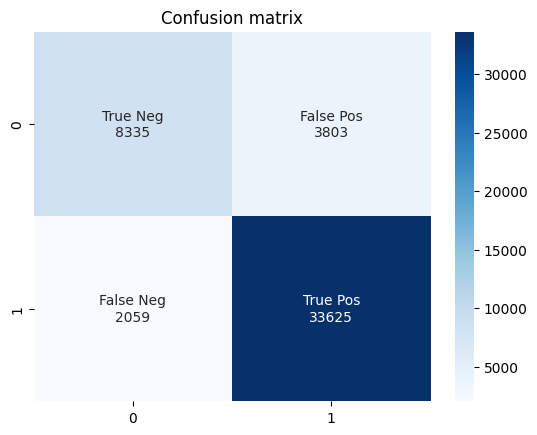

In [147]:
# Plotting confusion matrix
plot_confusion_matrix(confusion_train)

## Confusion Matrix for Test Dataset

In [148]:
confusion_test =metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_test)

[[ 2525  1473]
 [  693 11250]]


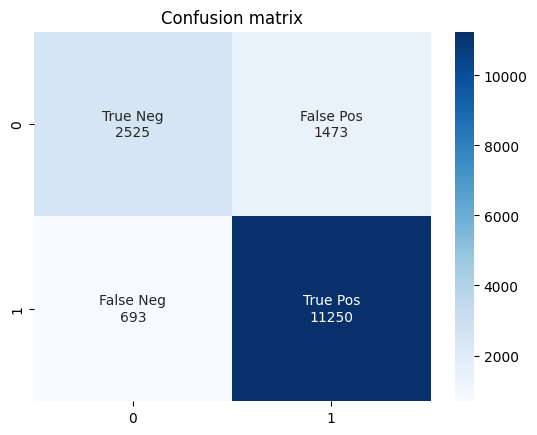

In [149]:
plot_confusion_matrix(confusion_test)

## Sensitivity, Specificity, Precision,Recall and F1 score for train and test dataset

In [150]:
# For train dataset
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]
TP_train = confusion_train[1, 1]

In [151]:
# For test datset
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]
TP_test = confusion_test[1, 1]

In [152]:
sensitivity_train = TP_train / float(FN_train + TP_train)
sensitivity_test = TP_test / float(FN_test + TP_test)
print("Sensitivity on train dataset",sensitivity_train)
print("Sensitivity on test dataset",sensitivity_test)

Sensitivity on train dataset 0.9422990696110302
Sensitivity on test dataset 0.9419743782969103


In [153]:
specificity_train = TN_train / float(TN_train + FP_train)
specificity_test = TN_test / float(TN_test + FP_test)
print("Specificity on train dataset",specificity_train)
print("Specificity on test dataset",specificity_test)

Specificity on train dataset 0.686686439281595
Specificity on test dataset 0.6315657828914457


In [154]:
precision_train = TP_train / float(TP_train + FP_train)
precision_test = TP_test / float(TP_test + FP_test)
print("Precision on train dataset",precision_train)
print("Precision on test dataset",precision_test)

Precision on train dataset 0.8983915784973816
Precision on test dataset 0.8842254185333648


In [155]:
print("Recall Score on train dataset :", metrics.recall_score(y_train, y_pred_train))
print("Recall Score on test dataset :", metrics.recall_score(y_test, y_pred_class))

Recall Score on train dataset : 0.9422990696110302
Recall Score on test dataset : 0.9419743782969103


In [156]:
print("F1 SCORE for train dataset :",metrics.f1_score(y_train, y_pred_train))
print("F1 SCORE for test dataset :",metrics.f1_score(y_test, y_pred_class))

F1 SCORE for train dataset : 0.919821643505854
F1 SCORE for test dataset : 0.9121868158598881


Here, sensitivity shoud be given more importance because it is a measure of the proportion of actual positive cases that got predicted as positive.

In [157]:
y_pred_class

array([1, 1, 1, ..., 1, 1, 1])

In [158]:
y_pred_proba

array([[1.95884860e-22, 1.00000000e+00],
       [4.79697012e-02, 9.52030299e-01],
       [4.28526018e-01, 5.71473982e-01],
       ...,
       [1.26627504e-21, 1.00000000e+00],
       [1.71117973e-04, 9.99828882e-01],
       [6.78413332e-02, 9.32158667e-01]])

# ROC curve

In [159]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report

In [160]:
# For train dataset
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate_tr, true_positive_rate_tr)

In [161]:
# For test dataset
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [162]:
# Area under the curve
print (roc_auc)

0.8857401571923867


In [163]:
# Matrix of Thresholds, TPR, FPR
pd.DataFrame({'Threshold': thresholds,
              'TPR': true_positive_rate,
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,inf,0.000000,0.000000
1,1.000000e+00,0.117893,0.010755
2,1.000000e+00,0.118061,0.010755
3,1.000000e+00,0.120238,0.011006
4,1.000000e+00,0.123001,0.011506
...,...,...,...
3414,1.326214e-42,0.999833,0.998499
3415,6.466846e-53,0.999833,0.998999
3416,1.764800e-67,0.999916,0.998999
3417,9.552049e-122,0.999916,1.000000


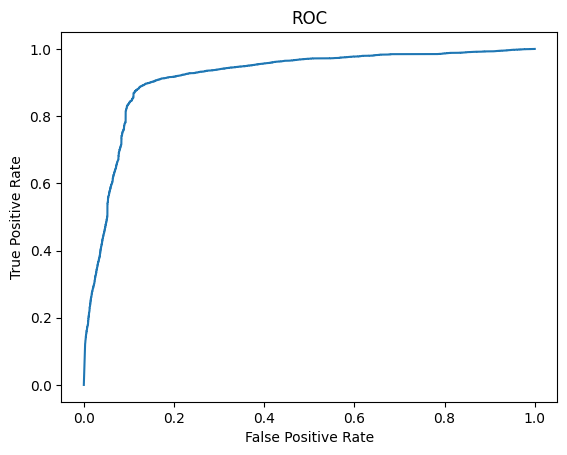

In [164]:
# Plotting the ROC curve for train set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)

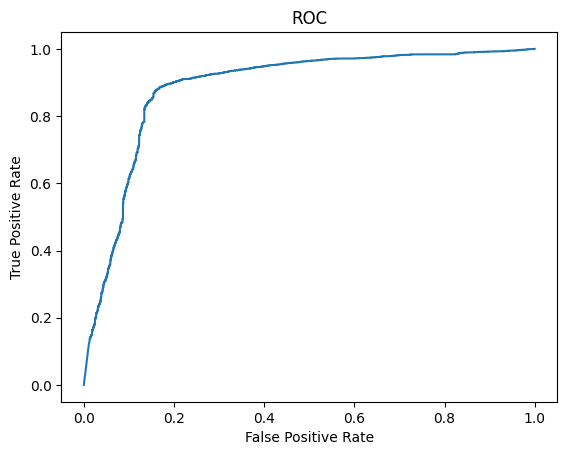

In [165]:
# Plotting the ROC curve for test set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

## We have checked sensitivity- specificity and precision-recall matrix for the model.

### Train dataset :

Accuracy(87%)

Sensitivity (94%)

Specificity(68%)

### Test Dataset :

Accuracy(86%)

Sensitivity (94%)

Specificity(62%)
## Models precision,recall,F1 score on train and test dataset are:
### Train dataset :

Precision(89%)

Recall (94%)

F1 score(92%)


### Test Dataset :

Precision(87%)

Recall (94%)

F1 score(91%)
# Area under curve is almost 88%
Since the distribution of the dataset is imbalanced with more positives, many reviews which were negative were incorrectly classified as positives by the NB model and hence the low specificity. From a business point of view, this is not a very good model as you will miss out on the negatives of your competitors. Knowing the weaknesses of your competitors help you design better features for the product and devise your marketing strategies accordingly.

In [166]:
# Printing the classification report
print("report for train set")
print(classification_report(y_train, y_pred_train))
print("report for test set")
print(classification_report(y_test, y_pred_class))

report for train set
              precision    recall  f1-score   support

           0       0.80      0.69      0.74     12138
           1       0.90      0.94      0.92     35684

    accuracy                           0.88     47822
   macro avg       0.85      0.81      0.83     47822
weighted avg       0.87      0.88      0.87     47822

report for test set
              precision    recall  f1-score   support

           0       0.78      0.63      0.70      3998
           1       0.88      0.94      0.91     11943

    accuracy                           0.86     15941
   macro avg       0.83      0.79      0.81     15941
weighted avg       0.86      0.86      0.86     15941



## Model 2: With Oversampling

A skewed data is the one where there are more training examples for one class than another. This was evident from the specificity which was calculated in the model above. This can cause the decision boundary weights to be biased. This causes the classifier to unwittingly prefer one class over the other.

We have shown the reason for the bias in the previous model and propose to alleviate the problem by using a method called Random oversampling. Random oversampling involves randomly selecting samples from the minority class (in our case 0s), with replacement, and adding them to the training dataset such that there is an equal distribution of the classes.

In [167]:
# Splitting the data into test and train
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [168]:
pd.Series(y_train).value_counts()

,count
review_sentiment,
1,35684
0,12138


In [169]:
from imblearn import over_sampling
ros = over_sampling.RandomOverSampler(random_state=0)

In [170]:
X_train, y_train = ros.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))

In [171]:
pd.Series(y_train).value_counts()

,count
review_sentiment,
1,35684
0,35684


In [172]:
# Vectorizing the sentences
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [173]:
# The CountVectorizer object, vect takes in a list of string as an argument. to get a list of string from a 2D array,
# We convert the 2D array to a dataframe and then convert it to a list.

X_train = pd.DataFrame(X_train).iloc[:,0].tolist()

# Printing a few samples from the list
X_train[:6]

['awesome,  its a gift for my wife....Hope she will like it too.....Thanks Hasslefree cell.........thanks for your quick customer feed back',
 'Nice phone. I just wanted a larger phone. Nothing wrong with the phone. Decent price. The company is wonderful. Treated me good and very fair. I recommend anyone to buy from this company.',
 'amazing photo for the price !!!!',
 'love this phone...service not so good.',
 'This is an amazing product. I love it',
 "Works great all the features work Seamlessly way better quality than my iPhone 6s . Don't get me wrong the iPhone 6s is a great phone it's just that samsung has outdone apple this time with a 2k screen (Quad hd) better camrea and almost all spec's are better\n\n**Update had this phone for about 4-5 months now still working great just take good care of your phone and it'll last a lifetime"]

In [174]:
# Fitting X_train into a vectorizer
vect.fit(X_train)

CountVectorizer()

In [175]:
# Transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

# Naive Bayes model with random oversampling

In [176]:
# Training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# Training dataset
y_pred_train = mnb.predict(X_train_transformed)
y_pred_proba_tr = mnb.predict_proba(X_train_transformed)

# Testing dataset
y_pred = mnb.predict(X_test_transformed)
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [177]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

### Model evaluation on Test dataset

In [178]:
# Printing the overall accuracy
from sklearn import metrics
print("Accuracy for test set is: ", metrics.accuracy_score(y_test, y_pred))
print("Accuracy for train set is: ", metrics.accuracy_score(y_train, y_pred_train))

Accuracy for test set is:  0.8626811366915501
Accuracy for train set is:  0.8843179015805402


Confusion matrix for train and test set


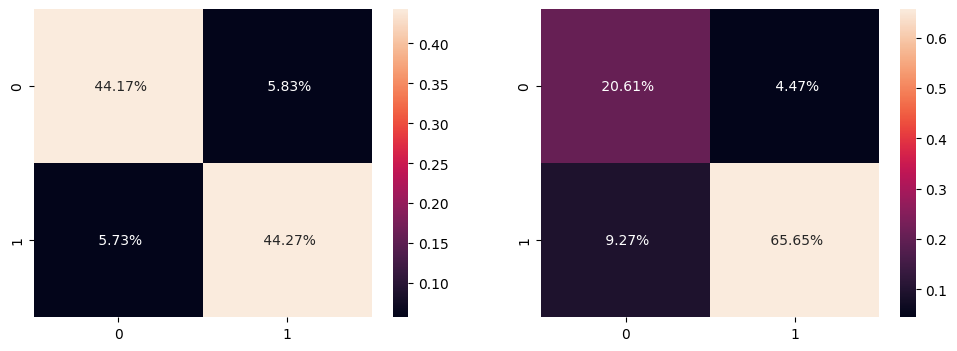

In [179]:
# Confusion matrix for the train data
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion matrix for train and test set")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# Confusion matrix for train set
cm_train = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train/np.sum(cm_train), annot=True , fmt = ' .2%')

plt.subplot(1,2,2)
# Confusion matrix for the test data
cm_test = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test/np.sum(cm_test), annot=True , fmt = ' .2%')

plt.show()


In [180]:
# Creating an ROC curve

# For test set
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

# For train set
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate, true_positive_rate)

In [181]:
# Area under the curve
print ("for train set: ",roc_auc_tr)
print ("for test set: ",roc_auc)

for train set:  0.885539164960526
for test set:  0.885539164960526


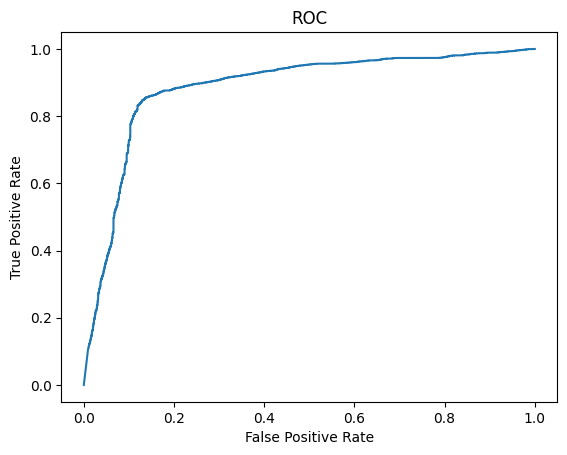

In [182]:
# Plotting the ROC curve for test set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

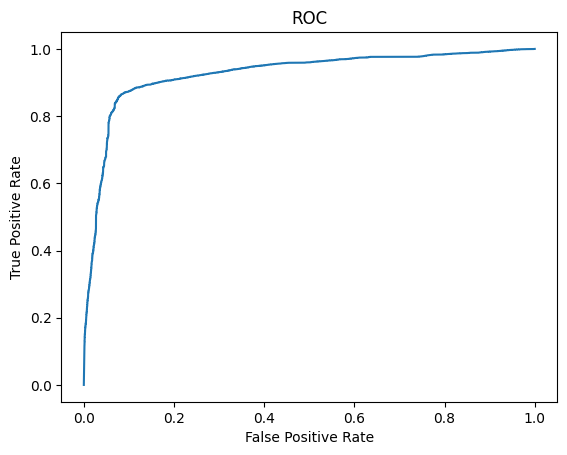

In [183]:
# Plotting the ROC curve for train set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)

In [184]:
# Storing the values in variables

# For test set
TN = cm_test[0, 0]
FP = cm_test[0, 1]
FN = cm_test[1, 0]
TP = cm_test[1, 1]

# For train set
TN_tr = cm_train[0, 0]
FP_tr = cm_train[0, 1]
FN_tr = cm_train[1, 0]
TP_tr = cm_train[1, 1]

In [185]:
# Specificity for test and train set.
specificity_tr = TN_tr / float(TN_tr + FP_tr)
print("Specificity for train set: ",specificity_tr)
specificity = TN / float(TN + FP)
print("Specificity for test set: ",specificity)

Specificity for train set:  0.8833090460710683
Specificity for test set:  0.8219109554777388


In [186]:
# Sensitivity for train and test set
sensitivity_tr = TP_tr / float(FN_tr + TP_tr)
print("Sensitivity for train set: ",sensitivity_tr)
sensitivity = TP / float(FN + TP)
print("Sensitivity for test set: ",sensitivity)

Sensitivity for train set:  0.8853267570900123
Sensitivity for test set:  0.8763292305115967


The test sensitivity and specificity of the model without oversampling were 94% and 62% respectively. The application of oversampling model has resulted in an equal distribution of the binary labels. This has resulted in a jump in specificity by 26% with a slight decrease in the sensitivity by 0.08. From a business point of view, we can say that this is a better model as compared to the one that was built without oversampling.

In [187]:
# Printing the classification report
print("report for train set")
print(classification_report(y_train, y_pred_train))
print("report for test set")
print(classification_report(y_test, y_pred))

report for train set
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     35684
           1       0.88      0.89      0.88     35684

    accuracy                           0.88     71368
   macro avg       0.88      0.88      0.88     71368
weighted avg       0.88      0.88      0.88     71368

report for test set
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      3998
           1       0.94      0.88      0.91     11943

    accuracy                           0.86     15941
   macro avg       0.81      0.85      0.83     15941
weighted avg       0.87      0.86      0.87     15941

